In [87]:
import numpy as np
import pmdarima as pm
from pmdarima import pipeline, preprocessing as ppc, arima
from matplotlib import pyplot as plt
import math


In [70]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pandas as pd
import datetime
%matplotlib inline
from scipy import stats

In [145]:
data2=pd.read_csv('datasets/iig_maitri.csv')
data2['obstime']=pd.to_datetime(data2['obstime'],format='%m/%d/%Y %H:%M')
data2=data2.drop(['rh','ws','wd','ap'] , axis=1)
data2=data2.set_index('obstime')
# print(data)

In [158]:

data=data2.resample('M').mean()
# print(data)
data.dropna(inplace=True)

In [159]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

tempr    11.216966
dtype: float64


In [160]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(47, 1)

In [169]:
train, test = data[:int(0.5*data.shape[0])], data[int(0.5*data.shape[0]):]

In [170]:
# Let's create a pipeline with multiple stages... the Wineind dataset is
# seasonal, so we'll include a FourierFeaturizer so we can fit it without
# seasonality
pipe = pipeline.Pipeline([
    ("fourier", ppc.FourierFeaturizer(m=12)),
    ("arima", arima.AutoARIMA(stepwise=True, trace=1, error_action="ignore",
                              seasonal=False,  # because we use Fourier
                              transparams=False,
                              suppress_warnings=True))
])

pipe.fit(train)
print("Model fit:")
print(pipe)


Fit ARIMA: order=(2, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0); AIC=86.872, BIC=102.769, Fit time=0.073 seconds
Fit ARIMA: order=(1, 0, 0); AIC=88.666, BIC=105.698, Fit time=0.192 seconds
Fit ARIMA: order=(0, 0, 1); AIC=88.669, BIC=105.701, Fit time=0.190 seconds
Fit ARIMA: order=(1, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.514 seconds
Model fit:
Pipeline(steps=[('fourier', FourierFeaturizer(k=None, m=12)), ('arima', AutoARIMA(D=None, alpha=0.05, callback=None, d=None, disp=0,
     error_action='ignore', information_criterion='aic', m=1, max_D=1,
     max_P=2, max_Q=2, max_d=2, max_order=10, max_p=5, max_q=5,
     maxiter=None, method=None, n_fits=10...ress_warnings=True, test='kpss', trace=1,
     transparams=False, trend=None, with_intercept=True))])


In [171]:
# print(test.size)
# preds, conf_int = pipe.predict(n_periods=int(test.size), return_conf_int=True)
preds, conf_int = pipe.predict(n_periods=100, return_conf_int=True)

temp=np.append(train,preds)
# print("\nForecasts:")
# print(preds)
# print(conf_int)

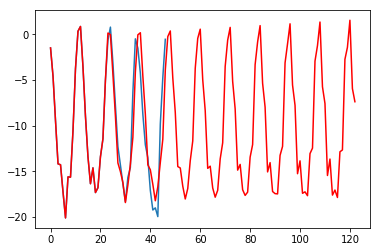

In [172]:
plt.plot(data.values)
plt.plot(temp,color='red')

In [168]:
testScore=math.sqrt(mean_squared_error(test, preds[:len(test)]))
print(testScore)

3.6255939595165687
